In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-depression-dataset/student_depression_dataset.csv


Load the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/student-depression-dataset/student_depression_dataset.csv")

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Check Basic Information About the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Check for Missing Values

In [5]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


Check for Duplicate Rows

In [6]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [7]:
df.shape

(27901, 18)

Inspect and Fix Data Types

In [8]:
df.dtypes
df['Age'] = df['Age'].astype(int) 
df['Academic Pressure'] = df['Academic Pressure'].astype(int) 
df['Work Pressure'] = df['Work Pressure'].astype(int)  
df['Study Satisfaction'] = df['Study Satisfaction'].astype(int) 
df['Job Satisfaction'] = df['Job Satisfaction'].astype(int) 
df['Work/Study Hours'] = df['Work/Study Hours'].astype(float)  

print("\nNew data types:")
print(df.dtypes)


New data types:
id                                         int64
Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                           int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


Clean Categorical Columns

In [9]:
print("Unique values in Gender:", df['Gender'].unique())
print("Unique values in Sleep Duration:", df['Sleep Duration'].unique())
print("Unique values in Dietary Habits:", df['Dietary Habits'].unique())
print("Unique values in Degree:", df['Degree'].unique())

# Standardizing 'Sleep Duration' (removing quotes and fixing typos if any)
df['Sleep Duration'] = df['Sleep Duration'].str.strip("'")

Unique values in Gender: ['Male' 'Female']
Unique values in Sleep Duration: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Unique values in Dietary Habits: ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Unique values in Degree: ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' "'Class 12'" 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']


Validate Numeric Ranges

In [10]:
print("Age range:", df['Age'].min(), "to", df['Age'].max())
print("CGPA range:", df['CGPA'].min(), "to", df['CGPA'].max())
print("Academic Pressure range:", df['Academic Pressure'].min(), "to", df['Academic Pressure'].max())
print("Study Satisfaction range:", df['Study Satisfaction'].min(), "to", df['Study Satisfaction'].max())
print("Work/Study Hours range:", df['Work/Study Hours'].min(), "to", df['Work/Study Hours'].max())

Age range: 18 to 59
CGPA range: 0.0 to 10.0
Academic Pressure range: 0 to 5
Study Satisfaction range: 0 to 5
Work/Study Hours range: 0.0 to 12.0


Final Check and Save Cleaned Dataset

In [11]:
print("Cleaned dataset preview:")

df.head()


Cleaned dataset preview:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [12]:

print("Final shape:" )

df.shape


Final shape:


(27901, 18)

In [13]:

df.to_csv("cleaned_student_depression_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_student_depression_dataset.csv'")

Cleaned dataset saved as 'cleaned_student_depression_dataset.csv'


Data visualisation 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Depression Prevalence Among Students

Percentage of students with depression: 58.55%


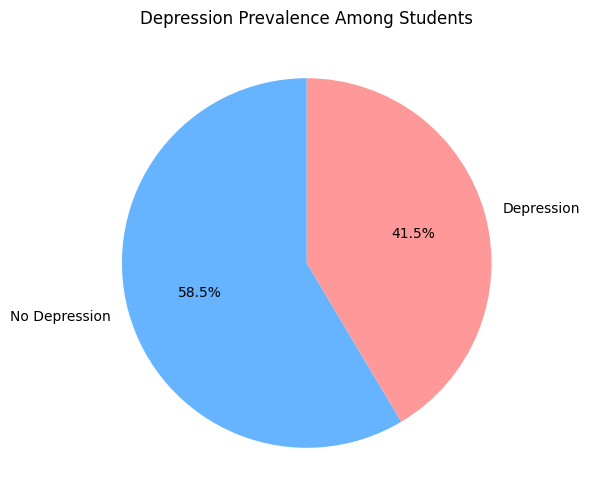

In [15]:
# Calculating depression rate
depression_rate = df['Depression'].mean() * 100  # Since Depression is 0 or 1
print(f"Percentage of students with depression: {depression_rate:.2f}%")

# Visualization: Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df['Depression'].value_counts(), labels=['No Depression', 'Depression'], 
        autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
plt.title('Depression Prevalence Among Students')
plt.show()

Depression by Gender

Depression rate by gender:
Gender
Female    58.450704
Male      58.628674
Name: Depression, dtype: float64


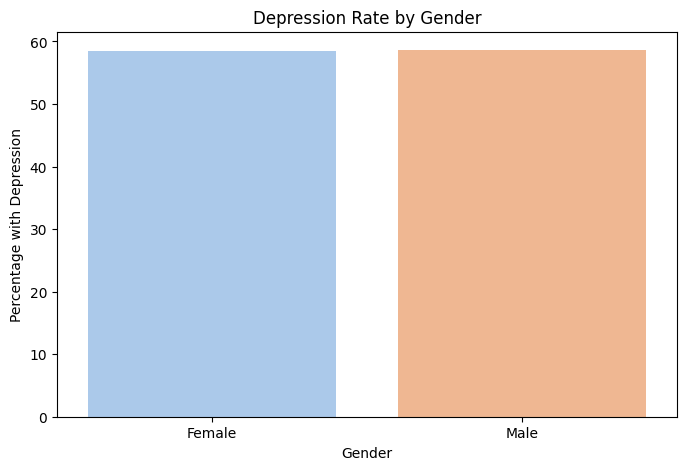

In [16]:
# Depression by gender
gender_depression = df.groupby('Gender')['Depression'].mean() * 100
print("Depression rate by gender:")
print(gender_depression)

# Visualization: Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_depression.index, y=gender_depression.values, palette='pastel')
plt.title('Depression Rate by Gender')
plt.ylabel('Percentage with Depression')
plt.show()

Age Distribution of Depressed Students

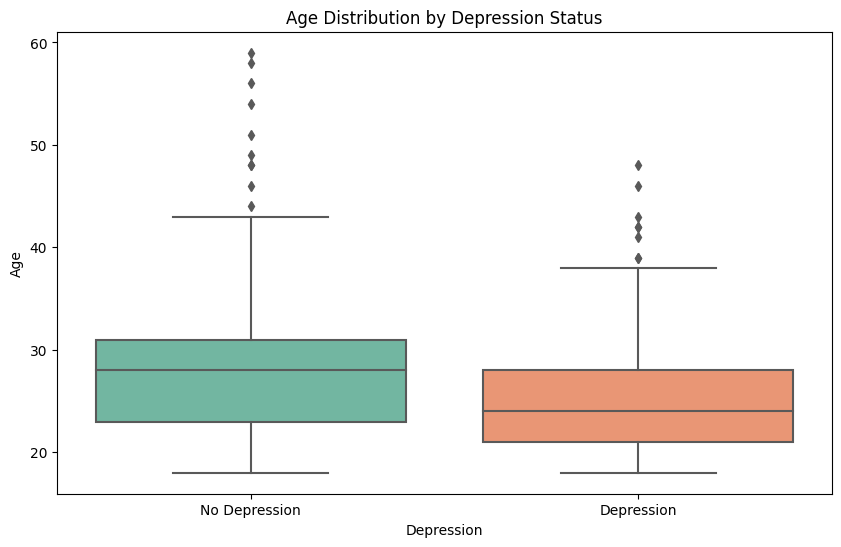

In [17]:
# Visualization: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Depression Status')
plt.xticks([0, 1], ['No Depression', 'Depression'])
plt.show()

Depression by City (Top 10 Cities)

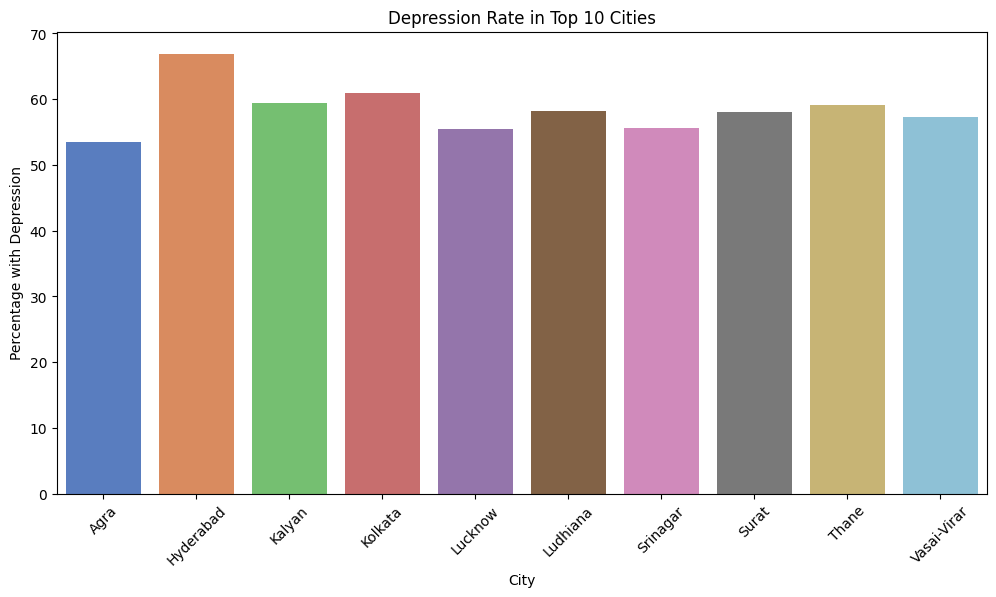

In [18]:
# Top 10 cities by student count
top_cities = df['City'].value_counts().head(10).index
city_depression = df[df['City'].isin(top_cities)].groupby('City')['Depression'].mean() * 100

# Visualization: Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=city_depression.index, y=city_depression.values, palette='muted')
plt.title('Depression Rate in Top 10 Cities')
plt.ylabel('Percentage with Depression')
plt.xticks(rotation=45)
plt.show()

Academic Pressure vs. Depression

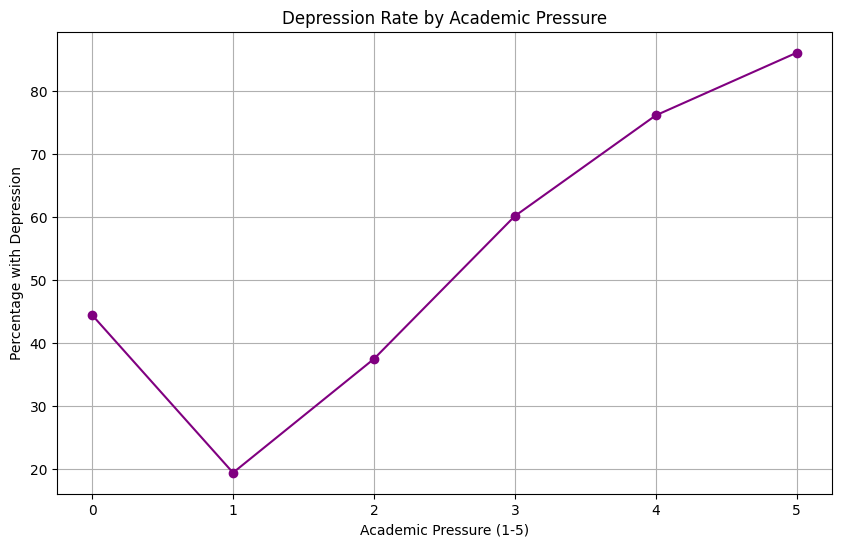

In [19]:
# Depression by Academic Pressure
academic_depression = df.groupby('Academic Pressure')['Depression'].mean() * 100

# Visualization: Line Plot
plt.figure(figsize=(10, 6))
plt.plot(academic_depression.index, academic_depression.values, marker='o', color='purple')
plt.title('Depression Rate by Academic Pressure')
plt.xlabel('Academic Pressure (1-5)')
plt.ylabel('Percentage with Depression')
plt.grid(True)
plt.show()

CGPA and Depression

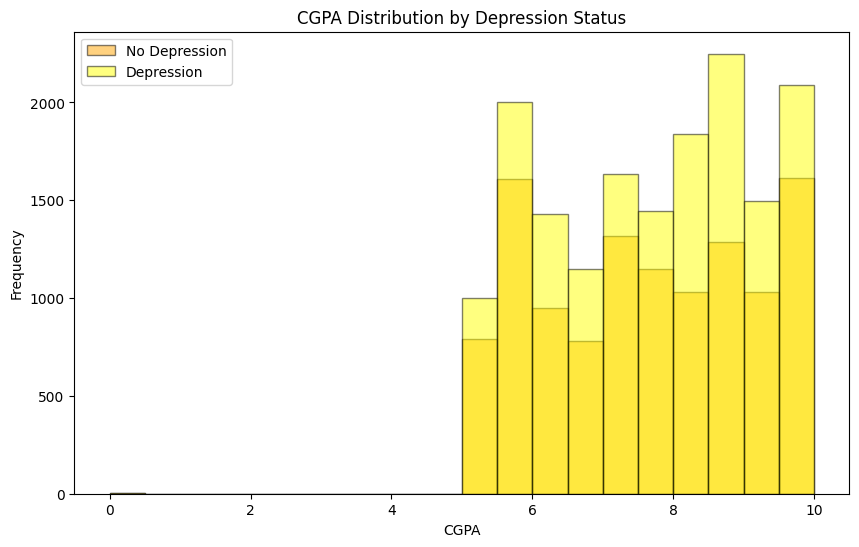

In [20]:
# Visualization: Histogram
plt.figure(figsize=(10, 6))
plt.hist(df[df['Depression'] == 0]['CGPA'], bins=20, alpha=0.5, label='No Depression', color='orange',edgecolor='black')
plt.hist(df[df['Depression'] == 1]['CGPA'], bins=20, alpha=0.5, label='Depression', color='yellow',edgecolor='black')
plt.title('CGPA Distribution by Depression Status')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Sleep Duration and Depression

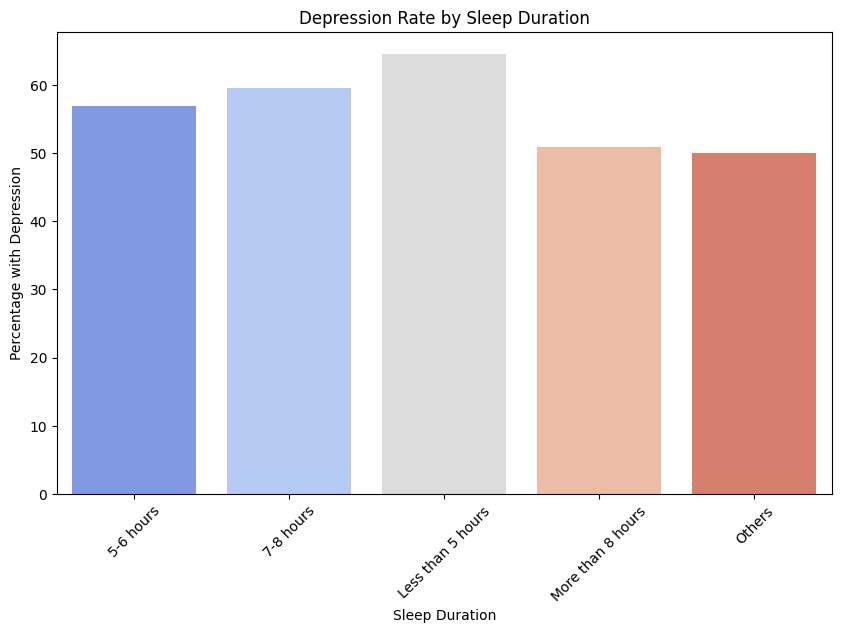

In [21]:
# Depression by Sleep Duration
sleep_depression = df.groupby('Sleep Duration')['Depression'].mean() * 100

# Visualization: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_depression.index, y=sleep_depression.values, palette='coolwarm')
plt.title('Depression Rate by Sleep Duration')
plt.ylabel('Percentage with Depression')
plt.xticks(rotation=45)
plt.show()

Dietary Habits and Depression

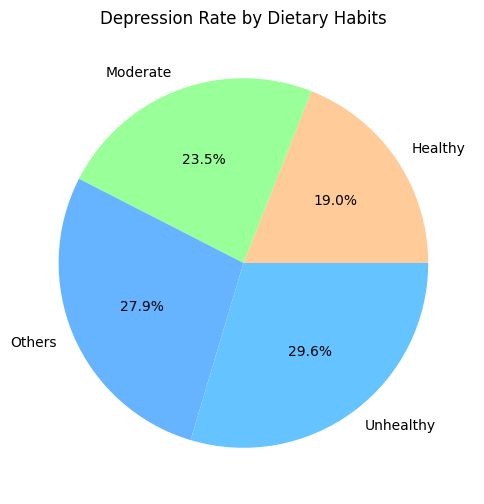

In [22]:
# Depression by Dietary Habits
diet_depression = df.groupby('Dietary Habits')['Depression'].mean() * 100

# Visualization: Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(diet_depression.values, labels=diet_depression.index, autopct='%1.1f%%', colors=['#ffcc99', '#99ff99', '#66b3ff','#65c3ff'])
plt.title('Depression Rate by Dietary Habits')
plt.show()

Degree Level and Depression

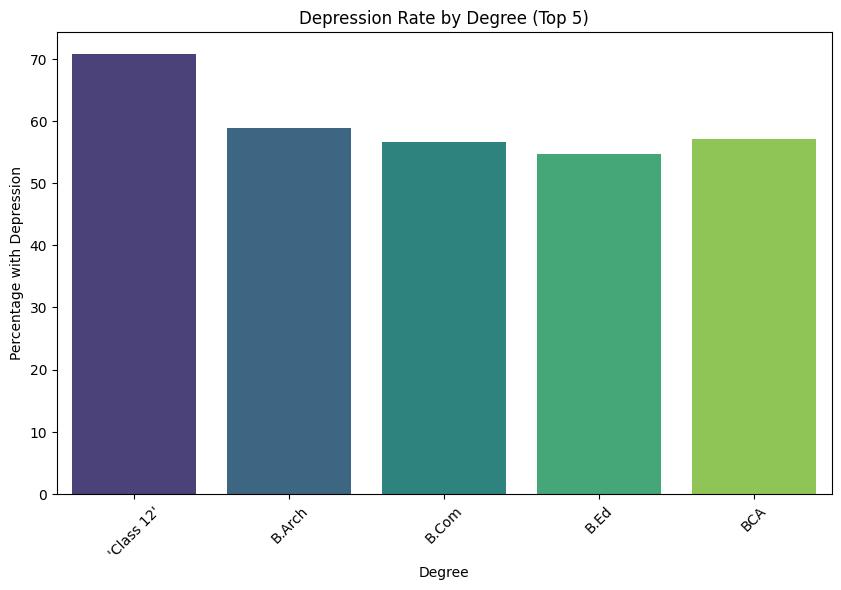

In [23]:
# Depression by Degree (Top 5 degrees)
top_degrees = df['Degree'].value_counts().head(5).index
degree_depression = df[df['Degree'].isin(top_degrees)].groupby('Degree')['Depression'].mean() * 100

# Visualization: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=degree_depression.index, y=degree_depression.values, palette='viridis')
plt.title('Depression Rate by Degree (Top 5)')
plt.ylabel('Percentage with Depression')
plt.xticks(rotation=45)
plt.show()

Work/Study Hours and Depression

<ipython-input-24-76e39c0af10b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_depression = df.groupby('Hours Group')['Depression'].mean() * 100
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


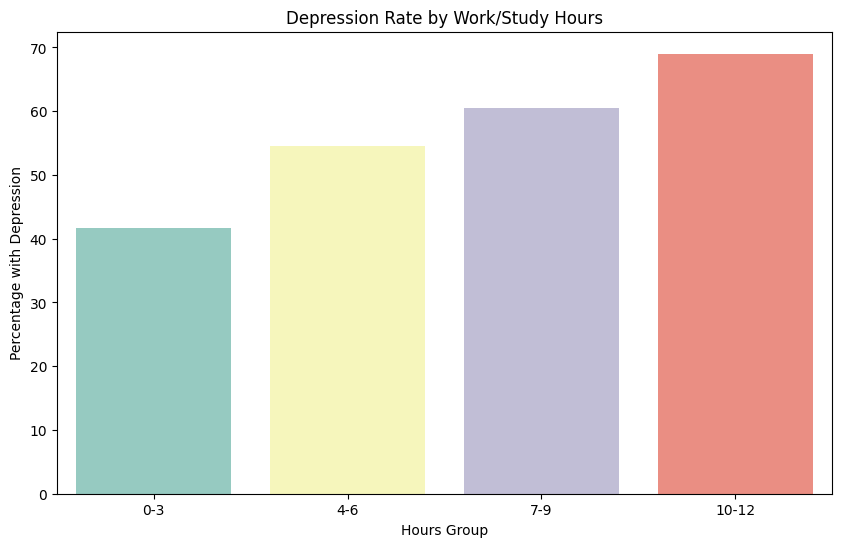

In [24]:
# Depression by Work/Study Hours (binned)
df['Hours Group'] = pd.cut(df['Work/Study Hours'], bins=[-1, 3, 6, 9, 12], 
                          labels=['0-3', '4-6', '7-9', '10-12'])
hours_depression = df.groupby('Hours Group')['Depression'].mean() * 100

# Visualization: Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=hours_depression.index, y=hours_depression.values, palette='Set3')
plt.title('Depression Rate by Work/Study Hours')
plt.ylabel('Percentage with Depression')
plt.show()

Family History of Mental Illness and Depression

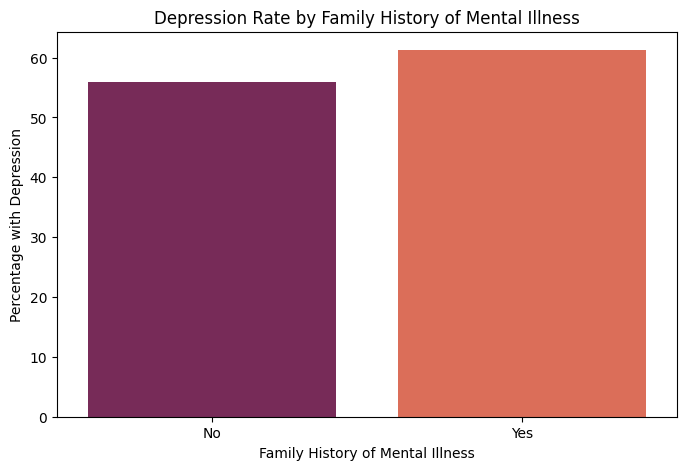

In [25]:
# Depression by Family History
family_depression = df.groupby('Family History of Mental Illness')['Depression'].mean() * 100

# Visualization: Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=family_depression.index, y=family_depression.values, palette='rocket')
plt.title('Depression Rate by Family History of Mental Illness')
plt.ylabel('Percentage with Depression')
plt.show()

Suicidal Thoughts and Depression

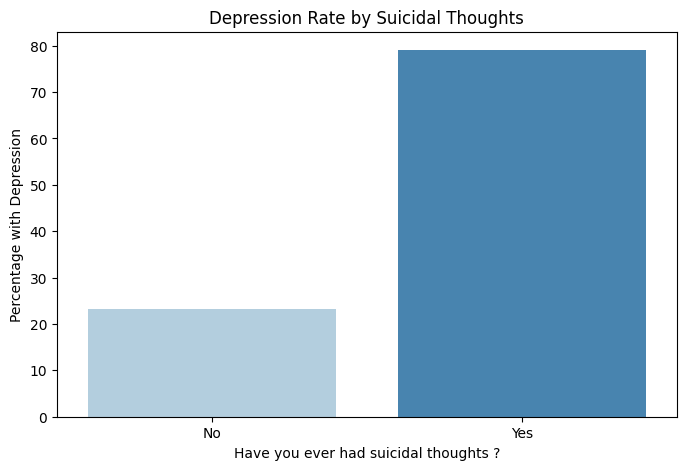

In [26]:
# Depression by Suicidal Thoughts
suicidal_depression = df.groupby('Have you ever had suicidal thoughts ?')['Depression'].mean() * 100

# Visualization: Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=suicidal_depression.index, y=suicidal_depression.values, palette='Blues')
plt.title('Depression Rate by Suicidal Thoughts')
plt.ylabel('Percentage with Depression')
plt.show()

Study Satisfaction vs. Depression

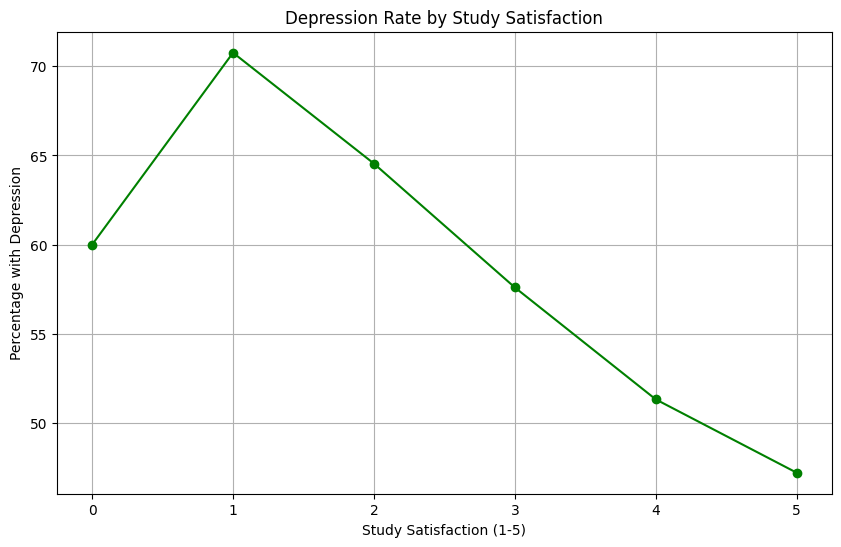

In [27]:
# Depression by Study Satisfaction
study_satisfaction_depression = df.groupby('Study Satisfaction')['Depression'].mean() * 100

# Visualization: Line Plot
plt.figure(figsize=(10, 6))
plt.plot(study_satisfaction_depression.index, study_satisfaction_depression.values, 
         marker='o', color='green')
plt.title('Depression Rate by Study Satisfaction')
plt.xlabel('Study Satisfaction (1-5)')
plt.ylabel('Percentage with Depression')
plt.grid(True)
plt.show()

Depression by Degree Level (Undergraduate vs. Postgraduate)

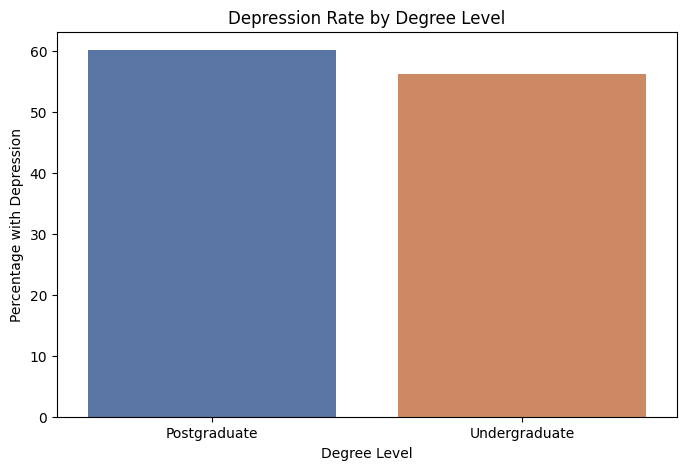

In [28]:
# Categorizing degrees as Undergraduate or Postgraduate
df['Degree Level'] = df['Degree'].apply(lambda x: 'Undergraduate' if x in ['Class 12', 'BSc', 'BA', 'B.Com', 'BCA', 'B.Ed', 'B.Pharm', 'BHM', 'B.Arch', 'BE', 'B.Tech'] 
                                      else 'Postgraduate')
degree_level_depression = df.groupby('Degree Level')['Depression'].mean() * 100

# Visualization: Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=degree_level_depression.index, y=degree_level_depression.values, palette='deep')
plt.title('Depression Rate by Degree Level')
plt.ylabel('Percentage with Depression')
plt.show()

Depression by Study Satisfaction and Gender

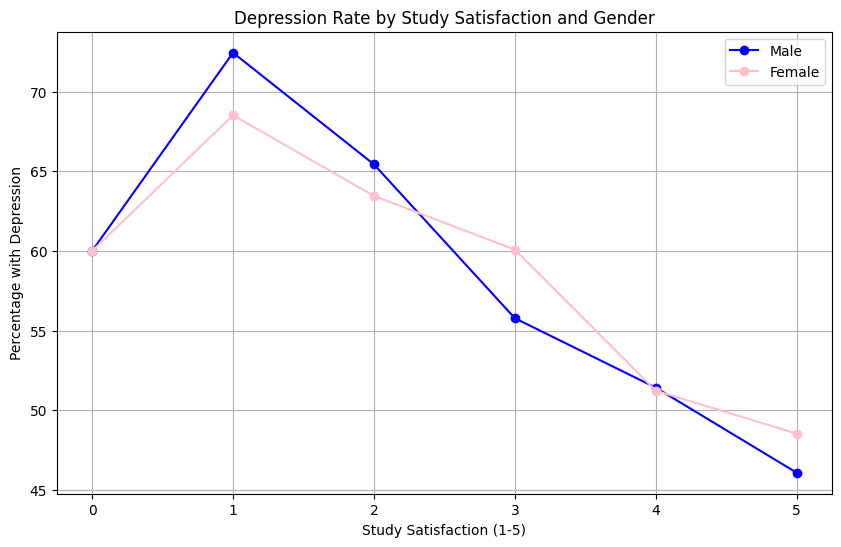

In [29]:
# Depression by Study Satisfaction and Gender
satisfaction_gender_depression = df.groupby(['Study Satisfaction', 'Gender'])['Depression'].mean().unstack() * 100

# Visualization: Line Plot
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_gender_depression.index, satisfaction_gender_depression['Male'], 
         marker='o', label='Male', color='blue')
plt.plot(satisfaction_gender_depression.index, satisfaction_gender_depression['Female'], 
         marker='o', label='Female', color='pink')
plt.title('Depression Rate by Study Satisfaction and Gender')
plt.xlabel('Study Satisfaction (1-5)')
plt.ylabel('Percentage with Depression')
plt.legend()
plt.grid(True)
plt.show()

Depression by Academic Pressure and Suicidal Thoughts

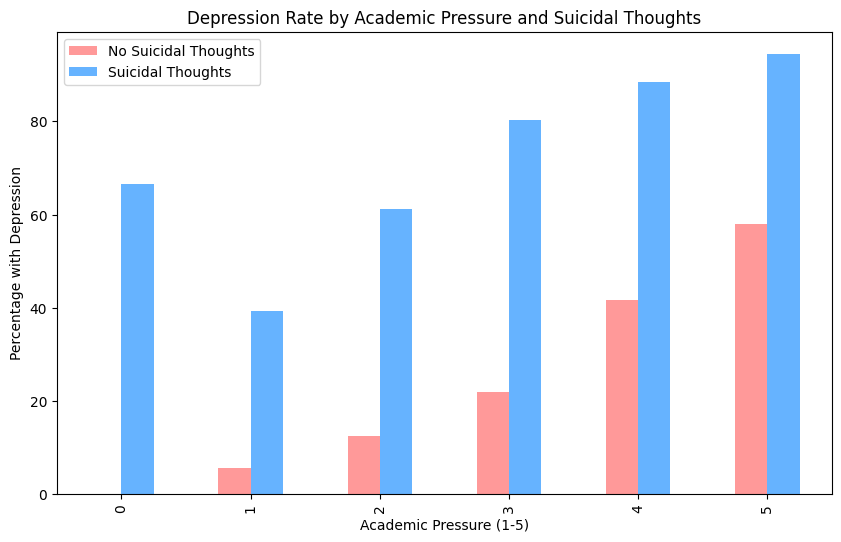

In [30]:
# Depression by Academic Pressure and Suicidal Thoughts
academic_suicidal_depression = df.groupby(['Academic Pressure', 'Have you ever had suicidal thoughts ?'])['Depression'].mean().unstack() * 100

# Visualization: Bar Plot
academic_suicidal_depression.plot(kind='bar', figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Depression Rate by Academic Pressure and Suicidal Thoughts')
plt.xlabel('Academic Pressure (1-5)')
plt.ylabel('Percentage with Depression')
plt.legend(['No Suicidal Thoughts', 'Suicidal Thoughts'])
plt.show()